Tämä koodi toteuttaa A*-algoritmin lyhimmän reitin löytämiseksi ruudukossa (gridissä), jossa on esteitä. Käydään läpi osia koodista:

### 1. Tuodut kirjastot
- `matplotlib.pyplot` ja `numpy`: Käytetään visualisoimaan ruudukko ja hallitsemaan matriisiesityksiä.
- `heapq`: Toteuttaa prioriteettijonon, jota tarvitaan A*-algoritmissa.
- `random`: Käytetään satunnaisten lähtö- ja maalipaikkojen valintaan.

### 2. `Node`-luokka
`Node`-luokka edustaa solmua A*-algoritmissa. Se tallentaa solmun sijainnin, edeltäjän (reitin rakentamista varten) sekä kustannukset (`g`, `h`, `f`).
- `g`: Kustannus lähtöpaikasta nykyiseen solmuun.
- `h`: Heuristinen arvio etäisyydestä maalipaikkaan (käytetään Manhattan-etäisyyttä).
- `f`: `g + h`, kokonaiskustannus, jota käytetään prioriteettijärjestykseen.

### 3. `heuristic`-funktio
Heuristinen funktio arvioi nykyisen solmun ja tavoitesolmun välisen etäisyyden. Tässä käytetään Manhattan-etäisyyttä.

### 4. `a_star_search`-funktio
Toteuttaa itse A*-algoritmin.
- **Lähtötilanne**: Algoritmi aloittaa luomalla alkuperäisen solmun ja lisää sen avoimeen listaan (priority queue).
- **Silmukka**: Algoritmi toistaa seuraavat vaiheet, kunnes löytyy reitti tai avoin lista on tyhjä.
  - Poistaa solmun, jolla on pienin `f`-arvo (lyhin arvioitu reitti) avoimesta listasta.
  - Tarkistaa, onko saavutettu tavoitesolmu. Jos on, palautetaan löydetty reitti.
  - Lisätään nykyinen solmu suljettuun joukkoon.
  - Luodaan naapurisolmut (ylös, alas, vasemmalle, oikealle) ja arvioidaan niiden kustannukset.
  - Naapurisolmu lisätään avoimeen listaan, jos sitä ei ole vielä käsitelty eikä se ole este.
  
### 5. `visualize_path`-funktio
Visualisoi ruudukon ja näyttää löytämänsä reitin.
- Luo kopion ruudukosta ja merkitsee reitin arvoilla `2`.
- Käyttää `matplotlib`-kirjastoa visualisoidakseen ruudukon.

### 6. Pääohjelma
Määrittää ruudukon, jossa `0` tarkoittaa vapaata tilaa ja `1` estettä.
- **Suorittaa viisi hakua**:
  - Arpoo lähtö- ja maalipaikan, joka ei ole este ja varmistaa, että ne ovat eri paikoissa.
  - Suorittaa A*-haun ja joko visualisoi reitin tai tulostaa viestin, jos reittiä ei löydy.

Koodi siis suorittaa lyhimmän reitin haun esteiden sisältämässä ruudukossa ja visualisoi löydetyt reitit. Tämä on hyödyllistä esimerkiksi robotin reittisuunnittelussa esteitä sisältävässä ympäristössä.

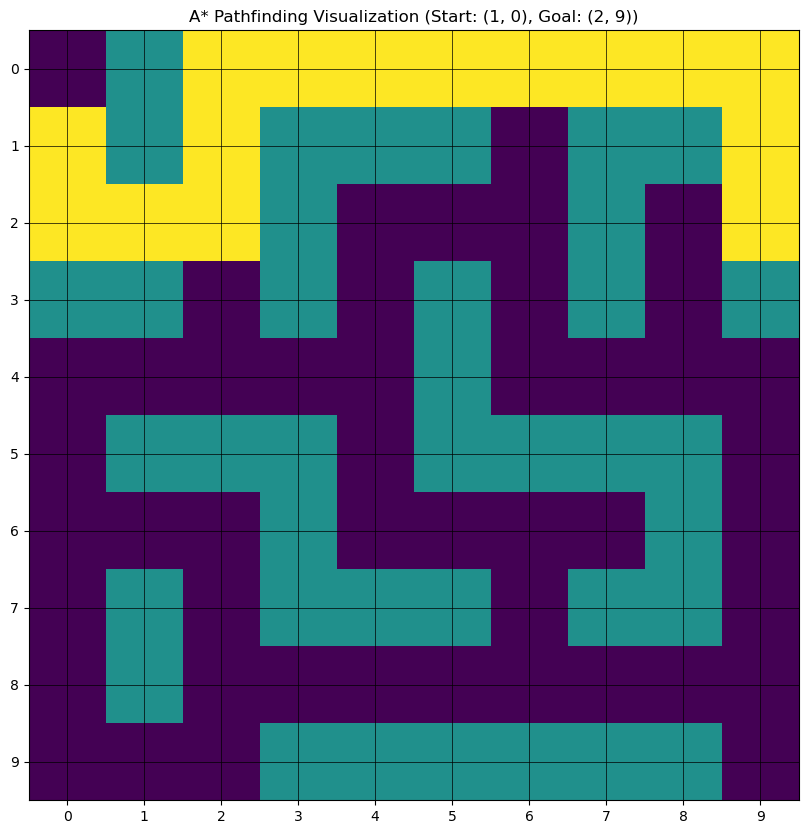

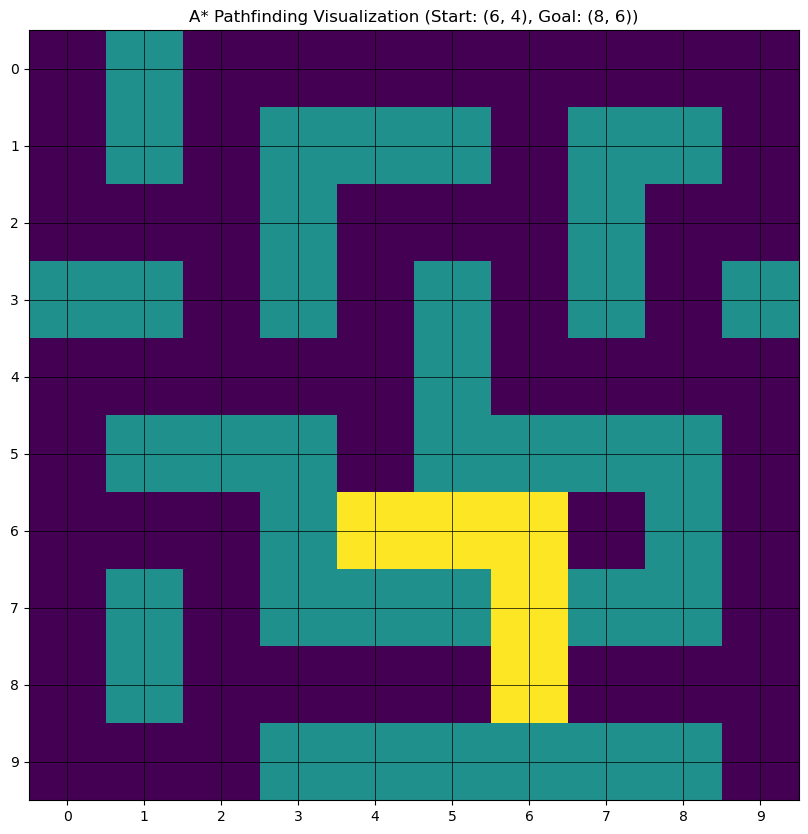

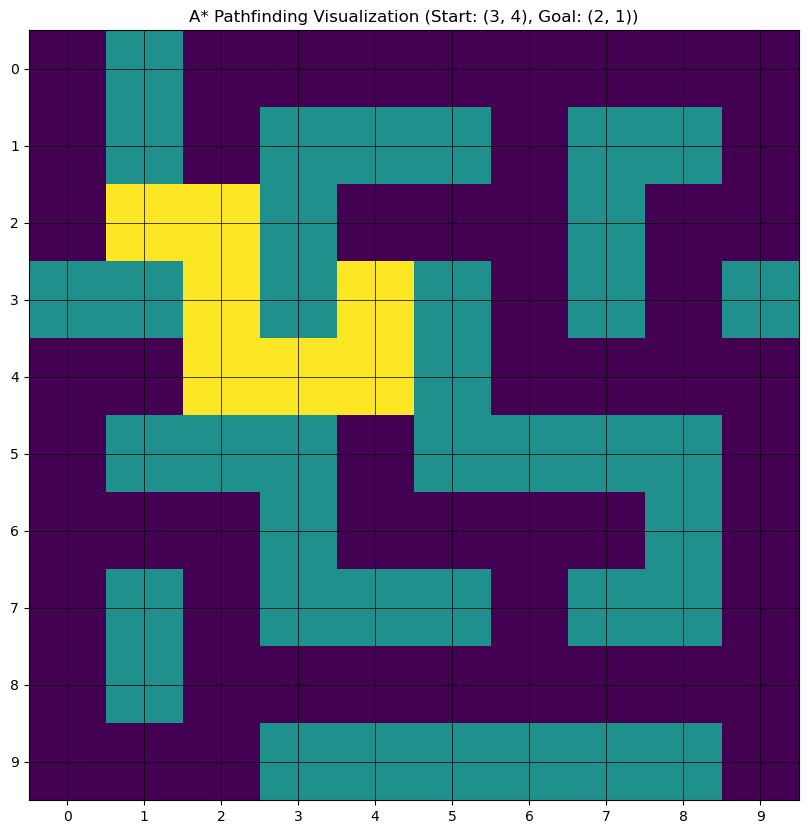

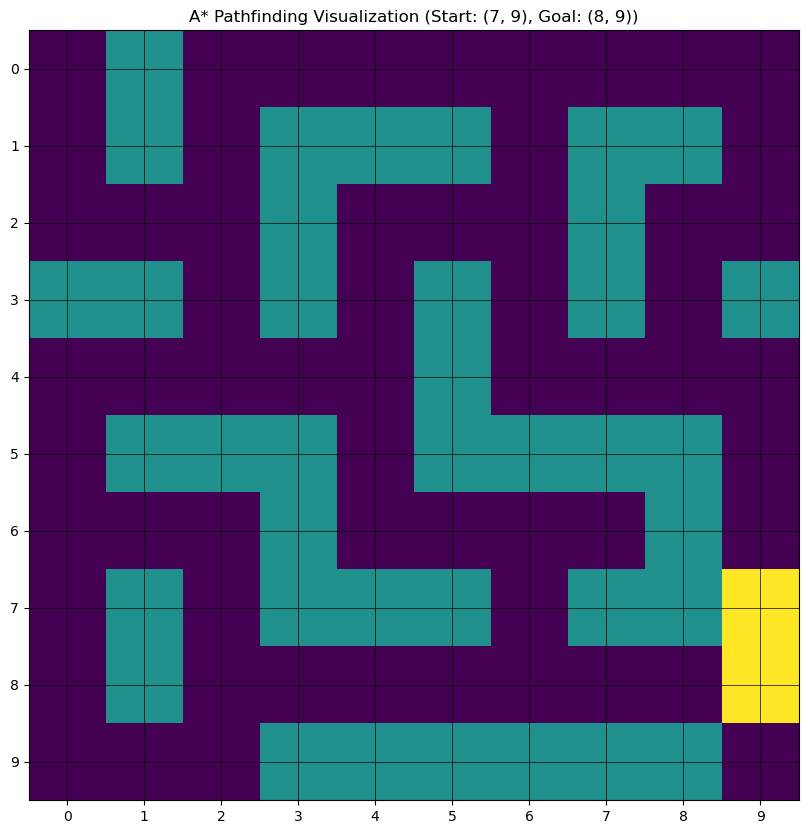

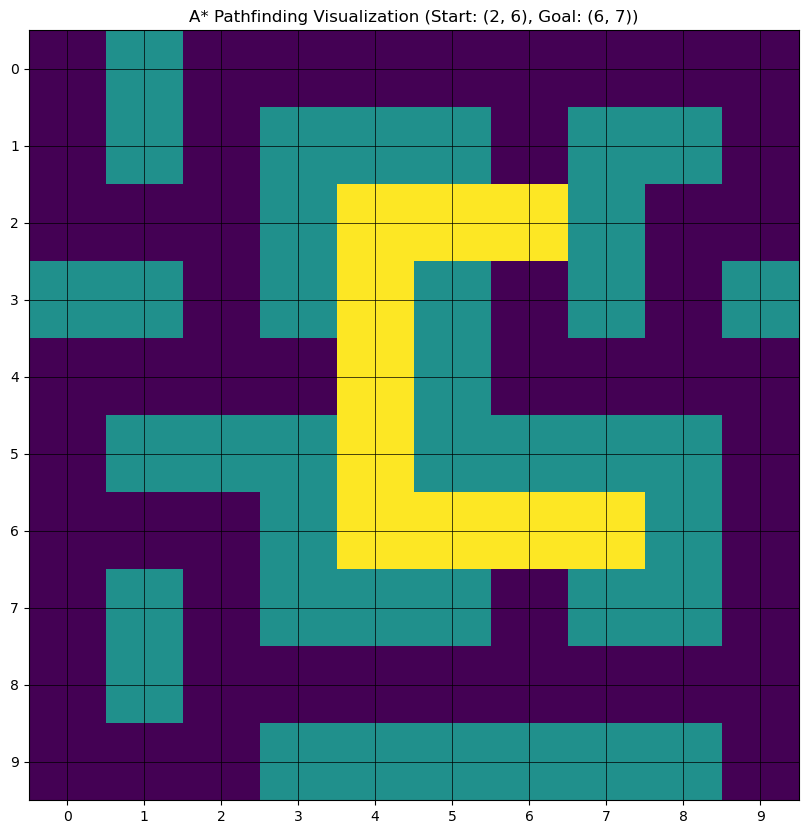

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
import random

# Node class to represent each position in the grid
class Node:
    def __init__(self, position, parent=None, g=0, h=0):
        self.position = position  # Position of the node (x, y)
        self.parent = parent  # Parent node for path reconstruction
        self.g = g  # Cost from start to this node
        self.h = h  # Heuristic cost to goal
        self.f = g + h  # Total cost (g + h)

    def __lt__(self, other):
        # Comparison operator for priority queue (based on f value)
        return self.f < other.f

# Heuristic function using Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* search algorithm implementation
def a_star_search(start, goal, grid):
    open_list = []  # Priority queue of nodes to explore
    closed_set = set()  # Set of nodes already explored
    start_node = Node(start, None, 0, heuristic(start, goal))
    heapq.heappush(open_list, start_node)  # Add start node to open list

    while open_list:
        current_node = heapq.heappop(open_list)  # Get node with lowest f value
        
        # Check if goal has been reached
        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)  # Reconstruct path from goal to start
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        closed_set.add(current_node.position)  # Add current node to closed set

        # Generate children nodes (neighboring positions)
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Up, Down, Left, Right
            node_position = (current_node.position[0] + new_position[0],
                            current_node.position[1] + new_position[1])

            # Ensure the new position is within the grid boundaries
            if node_position[0] < 0 or node_position[0] >= grid.shape[0] or node_position[1] < 0 or node_position[1] >= grid.shape[1]:
                continue
            # Skip positions that are obstacles (value 1 in the grid)
            if grid[node_position[0]][node_position[1]] != 0:
                continue

            # Skip nodes that are already in the closed set
            if node_position in closed_set:
                continue

            # Calculate costs for the new node
            g = current_node.g + 1  # Cost from start to this node
            h = heuristic(node_position, goal)  # Heuristic cost to goal
            new_node = Node(node_position, current_node, g, h)  # Create new node

            # Add the new node to the open list
            heapq.heappush(open_list, new_node)
    
    # Return None if no path is found
    return None

# Function to visualize the grid and the path found
def visualize_path(grid, path, title):
    visual = np.copy(grid)  # Create a copy of the grid for visualization
    for pos in path:
        visual[pos] = 2  # Mark the path positions in the grid
    plt.figure(figsize=(10, 10))
    plt.imshow(visual, cmap='viridis', interpolation='nearest')  # Display the grid
    plt.title(title)  # Set the title of the plot
    plt.xticks(range(grid.shape[1]))  # Set x-axis ticks
    plt.yticks(range(grid.shape[0]))  # Set y-axis ticks
    plt.grid(True, color='black', linewidth=0.5)  # Add grid lines
    plt.show()  # Show the plot

if __name__ == "__main__":
    # Define the grid (0 = free space, 1 = obstacle)
    grid = np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
    ])

    # Perform 5 random A* searches
    for i in range(5):
        while True:
            # Randomly select start and goal positions
            start = (random.randint(0, grid.shape[0] - 1), random.randint(0, grid.shape[1] - 1))
            goal = (random.randint(0, grid.shape[0] - 1), random.randint(0, grid.shape[1] - 1))
            # Ensure start and goal are not obstacles and are different
            if grid[start] == 0 and grid[goal] == 0 and start != goal:
                break

        # Perform A* search
        path = a_star_search(start, goal, grid)
        if path:
            # Visualize the path if found
            visualize_path(grid, path, f"A* Pathfinding Visualization (Start: {start}, Goal: {goal})")
        else:
            # Print message if no path is found
            print(f"No path found from {start} to {goal}.")